# Slide05 NumPy

* http://www.cs.utsa.edu/~jruan/teaching/cs5163f17/
* [Datacamp Numpy Tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)
* [O'REILLY Python for Data Analysis by Wes McKinney](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html)
* [NumPy Tutorial](https://blog.finxter.com/numpy-tutorial/)



# Outlines
- Numpy array creation
- access and operations
- Basic linear algebra

# Numpy
- It is for Numerical Python
- Is the fundamental package required for high performance computing and data analysis
- It provides
  - ndarray (N-Deminsional Array) for creating multiple dimensional arrays
  - Standard math functions for fast operations on entire arrays of data without having to write loops
  - Tools for reading / writing array data
  - Linear algebra tools 

# ndarray vs list of lists vs list of list of lists .... 

- Say you have grades of three exams (2 midterms and 1 final) in a class of 10 students.


In [8]:
# using a list of lists
examGrades=[[79, 95, 60],
            [95, 60, 61],
            [99, 67, 84],
            [76, 76, 97],
            [91, 84, 98],
            [70, 69, 96],
            [88, 65, 76],
            [67, 73, 80],
            [82, 89, 61],
            [94, 67, 88]]


In [ ]:
# How to get final exam grade of student 0?  

# How to get grades of student 2? 

# How to get grades of all students in midterm 1?

#How to get midterm grades of the first three students (or all female students, or those who failed final)?

#How to get mean grade of each exam?

#How to get (weighted) average exam grade for each student?

In [ ]:
# How to get final exam grade of student 0?  
print(examGrades[0][2])
# #ow to get grades of student 2? 
print(examGrades[2])

In [ ]:
# How to get grades of all students in midterm 1?
print(list(map(lambda x:x[0], examGrades)))
#How to get midterm grades of the first three students (or all female students, or those who failed final)?
print(list(map(lambda x:x[0], examGrades))[0:3])

In [ ]:
#How to get mean grade of each exam?
L1=list(map(lambda x:x[0], examGrades))
L2=list(map(lambda x:x[1], examGrades))
L3=list(map(lambda x:x[2], examGrades))
print(sum(L1)/len(L1))
print(sum(L2)/len(L2))
print(sum(L3)/len(L3))


In [ ]:
#How to get (weighted) average exam grade for each student?
W=[0.2,0.2,0.6]
for X in examGrades:
    WL=list(map(lambda x, w:x*w, X,W))
    print(sum(WL))

In [63]:
import numpy as np
gArray = np.array(examGrades)
print(gArray)

[[79 95 60]
 [95 60 61]
 [99 67 84]
 [76 76 97]
 [91 84 98]
 [70 69 96]
 [88 65 76]
 [67 73 80]
 [82 89 61]
 [94 67 88]]


In [ ]:
gArray[0,2]

In [ ]:
gArray[2,:]

In [ ]:
gArray[:, 0]

In [ ]:
gArray[:3, 1:2]

- **Please add print() for each** <font color="blue">In codes</font> 

# ndarray vs list of lists
- ndarray is used for storage of homogeneous data
  - i.e., all elements must be the same type
- Every array must have a shape
- And a dtype
-  convenient slicing, indexing and efficient vectorized computation
   - Avoid for loops, and much more efficient



In [ ]:
type(gArray)

In [ ]:
gArray.ndim

In [ ]:
gArray.shape

In [ ]:
gArray.dtype

# Creating ndarrays

- np.array

In [ ]:
np.array([[0,1,2],[2,3,4]])

- np.zeros

In [ ]:
np.zeros((2,3))

- np.ones

In [ ]:
np.ones((2,3))

- np.eye

In [ ]:
np.eye(3)

- np.arrange

In [ ]:
np.arange(0, 10, 2)

- np.random

In [ ]:
np.random.randint(0, 10, (3,3))

# Numpy data types
- int8, int16, int32, int64
- float16, float32, float64, float128
- bool
- object
- String
- Unicode

- gArray.astype


- float

In [ ]:
gArray.astype(dtype='float64')

- String

In [ ]:
num_string = np.array(['1.0', '2.05', '3'])
num_string

In [ ]:
num_string.astype(float)

# Array operations
* Between arrays and scalars
* Between equal-sized arrays: elementwise operation

In [ ]:
arr = np.array([[0,1,2],[3,4,5]])

In [ ]:
arr * 2

In [ ]:
arr ** 2

In [ ]:
2 ** arr

In [ ]:
arr * arr

# Speed difference between "For Loop" and "Vectorized" computation

In [ ]:
import timeit
timeit.timeit('\
import numpy as np;\
a = np.random.rand(1000000,1);\
a**2'\
, number=100)

In [ ]:
timeit.timeit('\
import numpy as np;\
a = np.random.rand(1000000,1);\
[a[i]**2 for i in range(1000000)]'\
, number=100)

* <font color="red">Vectorization is more than 300 times faster!</font> 

In [ ]:
timeit.timeit('\
import numpy as np;\
a = np.random.rand(1000000,1);\
list(map(lambda x: x**2, a))'\
, number=100)

* <font color="red">map appears to be very fast, but it is just because it is lazy – actual calculation has not been done yet.</font>  

# Laziness
* [Python Memory Efficiency Programming](https://medium.com/learning-better-ways-of-interpretting-and-using/python-generators-memory-efficient-programming-tool-41f09077353c)
* In terms of efficiency, like most functional programming constructs, MAP CAN BE LAZY, and in fact is lazy in python. That means you can do this (in python3) and your computer will not run out of memory and lose all your unsaved data:

In [ ]:
map(str, range(10**100))

In [ ]:
[str(n) for n in range(10**100)]
# don't run it

Do note that list comprehensions are also inherently lazy, but python has chosen to implement them as non-lazy. Nevertheless, python does support lazy list comprehensions in the form of generator expressions, as follows:

In [ ]:
(str(n) for n in range(10**100))

In [ ]:
gen=(str(n) for n in range(10**100))
print(type(gen))

# Speed difference between for loop and vectorized computation

In [5]:
def mySum():
    import numpy as np
    a = np.random.rand(1000000,1)
    s = 0
    for i in range(len(a)):
        s += a[i]
    return s 

In [7]:
import timeit
timeit.timeit(mySum, setup="from __main__ import mySum", number=100)

125.96518749999998

In [1]:
def mySum2():
    import numpy as np
    a = np.random.rand(1000000,1)
    return np.sum(a)

In [3]:
import timeit
timeit.timeit(mySum2, setup="from __main__ import mySum2", number=100)

1.3684696999999995

* <font color="red">Vectorization is 100 times faster than for loop.</font>

# Array indexing and slicing
- Somewhat similar to python list, but much more flexible

In [11]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

In [12]:
gArray[0]

array([79, 95, 60])

In [13]:
gArray[1:3]

array([[95, 60, 61],
       [99, 67, 84]])

In [14]:
gArray[0][2]

60

In [32]:
gArray[0,2]

60

In [16]:
gArray[:, 2]

array([60, 61, 84, 97, 98, 96, 76, 80, 61, 88])

# Array indexing and slicing (cont’d)

In [17]:
gArray[:2, [0, 2]]

array([[79, 60],
       [95, 61]])

In [18]:
gArray[[0, 2], :]

array([[79, 95, 60],
       [99, 67, 84]])

In [25]:
gArray[[0, 2, 1], [0, 1, 2]]

array([79, 67, 61])

In [24]:
gArray[[0, 2], [0, 2]]

array([79, 84])


# Array indexing and slicing (cont’d)

In [29]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

In [35]:
gArray[[0,2]][:,[0,2]]
# try to print(gArray[[0,2]])

array([[79, 60],
       [99, 84]])

In [36]:
gArray[np.ix_([0, 2], [0, 2])]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ix_.html

array([[79, 60],
       [99, 84]])

# Array slices are views

In [38]:
gArray[0,:]=100
gArray

array([[100, 100, 100],
       [ 95,  60,  61],
       [ 99,  67,  84],
       [ 76,  76,  97],
       [ 91,  84,  98],
       [ 70,  69,  96],
       [ 88,  65,  76],
       [ 67,  73,  80],
       [ 82,  89,  61],
       [ 94,  67,  88]])

In [45]:
arr2 = gArray.copy()

In [46]:
arr2 is gArray

True

In [47]:
arr2[1,:]=100

In [48]:
gArray[1,:]

array([100, 100, 100])

- Use .copy() to make a copy of an array explicitly.

# Boolean indexing

In [49]:
# select record for female students
female = [ True, False,  True,  True, False,  True, False, False, False, False]

In [50]:
gArray[female, :]

array([[100, 100, 100],
       [ 99,  67,  84],
       [ 76,  76,  97],
       [ 70,  69,  96]])

In [51]:
# select record for those who had # <= 70 in final
gArray[gArray[:, 2]<70,:]

array([[82, 89, 61]])

In [52]:
# anything < 70 is changed to 70
gArray[gArray < 70] = 70

In [53]:
gArray

array([[100, 100, 100],
       [100, 100, 100],
       [ 99,  70,  84],
       [ 76,  76,  97],
       [ 91,  84,  98],
       [ 70,  70,  96],
       [ 88,  70,  76],
       [ 70,  73,  80],
       [ 82,  89,  70],
       [ 94,  70,  88]])

# Reshaping and transposing

<div>
<img src="https://raw.githubusercontent.com/LiqingZhang-um/Markdown-Photos-/master/Picture5.png" width="20%"/>
</div>


In [54]:
np.arange(6).reshape((2,3))

array([[0, 1, 2],
       [3, 4, 5]])

In [55]:
np.arange(6).reshape((2,3), order='F')

array([[0, 2, 4],
       [1, 3, 5]])

In [56]:
np.arange(6).reshape(2,3).T

array([[0, 3],
       [1, 4],
       [2, 5]])

# Fast element-wise functions
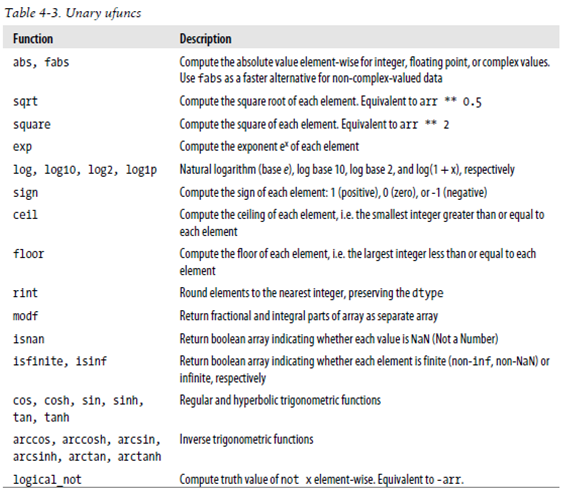

# Binary universal functions
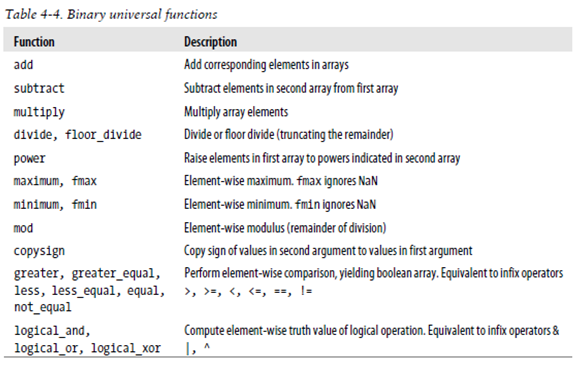

# Matrix
- A matrix is a rectangular array of numbers organized in rows and columns
- If a matrix A has m rows and n columns, then we say that A is an m x n matrix
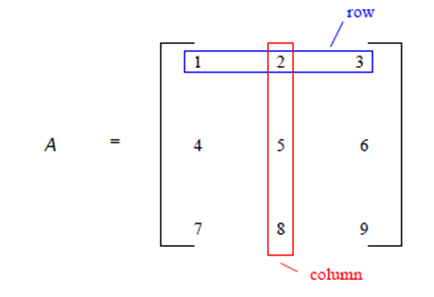

# Matrix
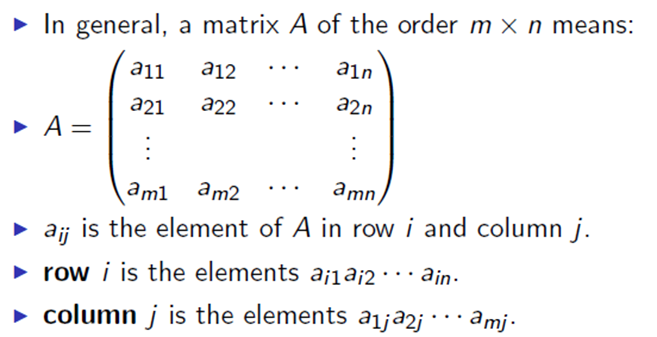

# Vectors
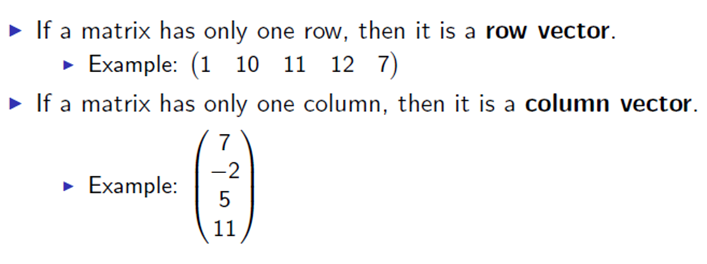


# Identity matrix
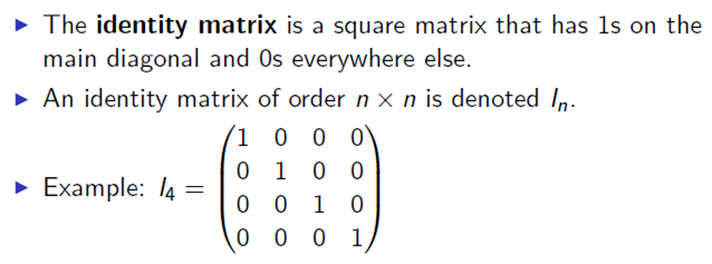

# Diagonal matrix
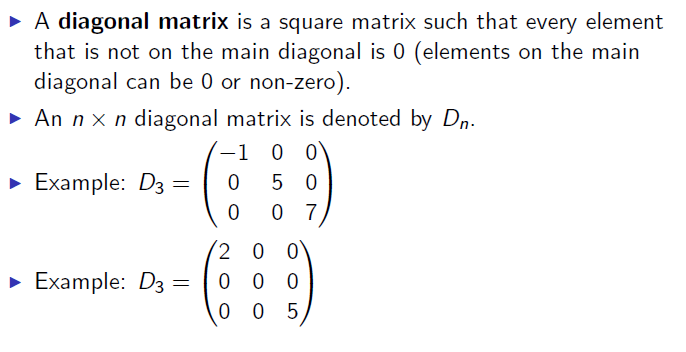

# Dot product
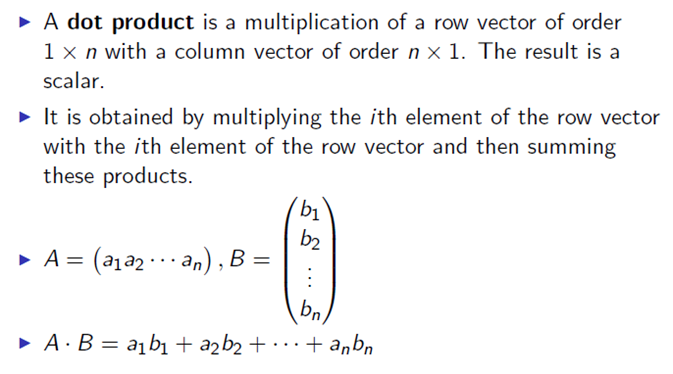

In [58]:
a = b = np.arange(5)

In [59]:
a

array([0, 1, 2, 3, 4])

In [60]:
b

array([0, 1, 2, 3, 4])

In [61]:
a.dot(b)

30

# Matrix multiplication
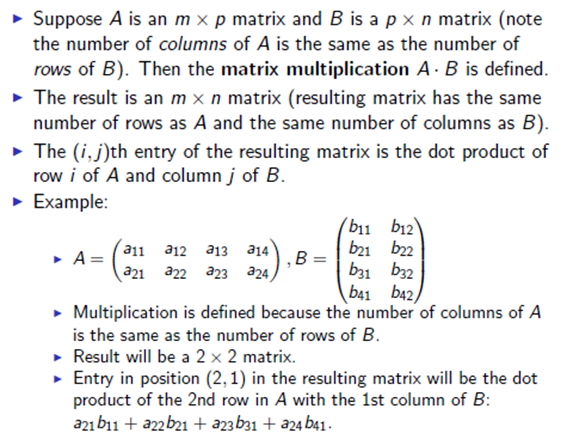

# Matrix multiplication

In [64]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

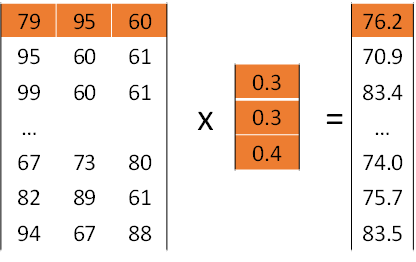

In [65]:
gArray.dot([0.3, 0.3, 0.4])

array([76.2, 70.9, 83.4, 84.4, 91.7, 80.1, 76.3, 74. , 75.7, 83.5])

# Matrix multiplication (cont’)

In [66]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

In [67]:
scaling = [1.1, 1.05, 1.03]
np.diag(scaling)

array([[1.1 , 0.  , 0.  ],
       [0.  , 1.05, 0.  ],
       [0.  , 0.  , 1.03]])

In [68]:
gArray.dot(np.diag(scaling))

array([[ 86.9 ,  99.75,  61.8 ],
       [104.5 ,  63.  ,  62.83],
       [108.9 ,  70.35,  86.52],
       [ 83.6 ,  79.8 ,  99.91],
       [100.1 ,  88.2 , 100.94],
       [ 77.  ,  72.45,  98.88],
       [ 96.8 ,  68.25,  78.28],
       [ 73.7 ,  76.65,  82.4 ],
       [ 90.2 ,  93.45,  62.83],
       [103.4 ,  70.35,  90.64]])

- What are we doing here?

# Matrix multiplication (cont’)

In [69]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

In [70]:
gArray.max(axis=0)

array([99, 95, 98])

In [71]:
maxInExam = gArray.max(axis=0)
gArray.dot(np.diag(100/maxInExam)).round()

array([[ 80., 100.,  61.],
       [ 96.,  63.,  62.],
       [100.,  71.,  86.],
       [ 77.,  80.,  99.],
       [ 92.,  88., 100.],
       [ 71.,  73.,  98.],
       [ 89.,  68.,  78.],
       [ 68.,  77.,  82.],
       [ 83.,  94.,  62.],
       [ 95.,  71.,  90.]])

- What are we doing here?

# Speed difference between for loop and matrix multiplication

In [72]:
a = np.random.rand(10000, 100)

In [ ]:
timeit a.dot(100/a.max(0))

In [ ]:
timeit [a[:,i]*100/max(a[:,i]) for i in range(100)]

In [ ]:
timeit [[a[j,i]*100/max(a[:,i]) for i in range(100)
                                for j in range(10000)]]

- Ctrl-C

# Speed difference between for loop and matrix multiplication

In [ ]:
maxInCol = a.max(axis=0)

In [ ]:
maxInCol.shape

In [ ]:
timeit [a[:i]*100/max(a[:,i]) for i in range(100)]

In [ ]:
timeit [[a[j,i]*100/maxInCol[i] for i in range(100)] for j in range(10000)]

# Basic statistics

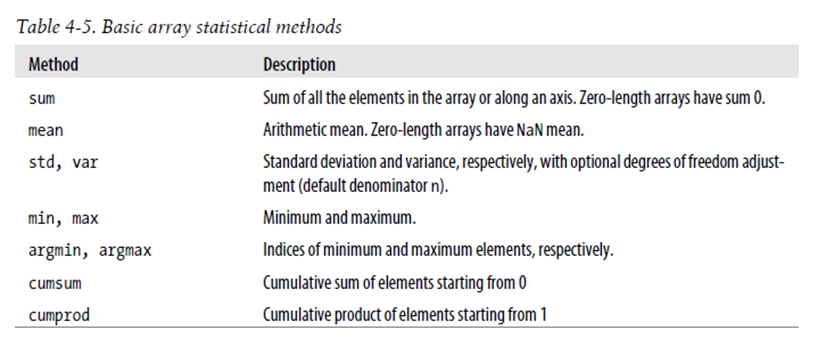

# Basic statistics

In [ ]:
a=np.random.randint(0, 5, size=(3,3))

In [ ]:
a

In [ ]:
a.sum()

In [ ]:
a.sum(axis=0)

In [ ]:
a.sum(1)

In [ ]:
(a > 2).any(1)

# numpy.sort()

In [ ]:
a.sort()

In [ ]:
a

In [ ]:
a.sort(0)

In [ ]:
a

# Adjacency matrix for a graph

In [ ]:
friends=np.array([[0, 2],
       [0, 6],
       [1, 3],
       [4, 7],
       [5, 8],
       [6, 7]], dtype='int64')


In [ ]:
n=friends.max()
	...: frdGraph = np.zeros((n+1,n+1))
     ...: frdGraph[friends[:,0],friends[:,1]]=1
     ...: frdGraph[friends[:,1],friends[:,0]]=1
     ...: imshow(frdGraph)
     ...: xticks(range(9))


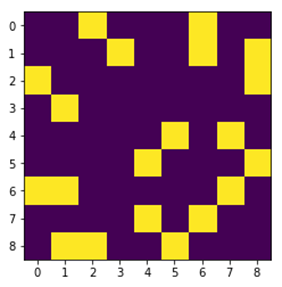

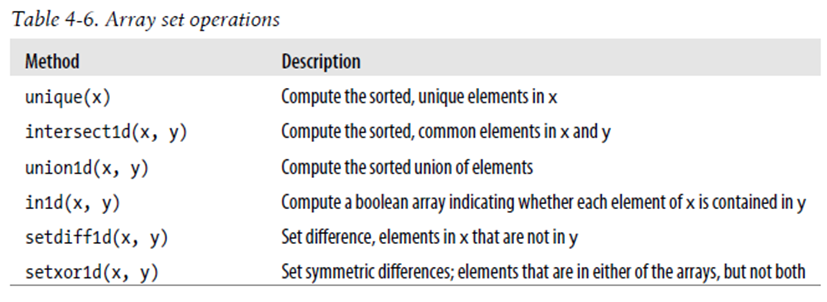

In [ ]:
edgeList=np.array([['Amy', 'Frank'],
                   ['Amy', 'Katy'],
                   ['Emma', 'James'],
                   ['Cindy', 'Rose'],
                   ['Tim', 'John'],
                   ['Katy', 'Rose']], dtype='<U5')

In [ ]:
names, indices = np.unique(edgeList, return_inverse=True)

In [ ]:
names

In [ ]:
indices

In [ ]:
np.reshape(indices,(-1, 2)).T

In [ ]:
edgeList=np.array([['Amy', 'Frank'],
['Amy', 'Katy'],
['Emma', 'James'],
['Cindy', 'Rose'],
['Tim', 'John'],
['Katy', 'Rose']], 
dtype='<U5')

In [ ]:
names, indices = np.unique(edgeList, return_inverse=True)

In [ ]:
names

In [ ]:
n = indices.max()
     ...: frdGraph2 = np.zeros((n+1,n+1))
     ...: frdGraph2[indices[::2], indices[1::2]] = 1
     ...: frdGraph2[indices[1::2], indices[::2]] = 1
     ...: imshow(frdGraph2); xticks(range(n+1))

# Sparse matrix support
* In scipy.sparse
* Necessary for larger sparse graphs (e.g. social networks)
* Most real world networks are sparse
* Memory efficiency is crucial for applications

* https://docs.scipy.org/doc/scipy/reference/index.html